<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Data_Clustering_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

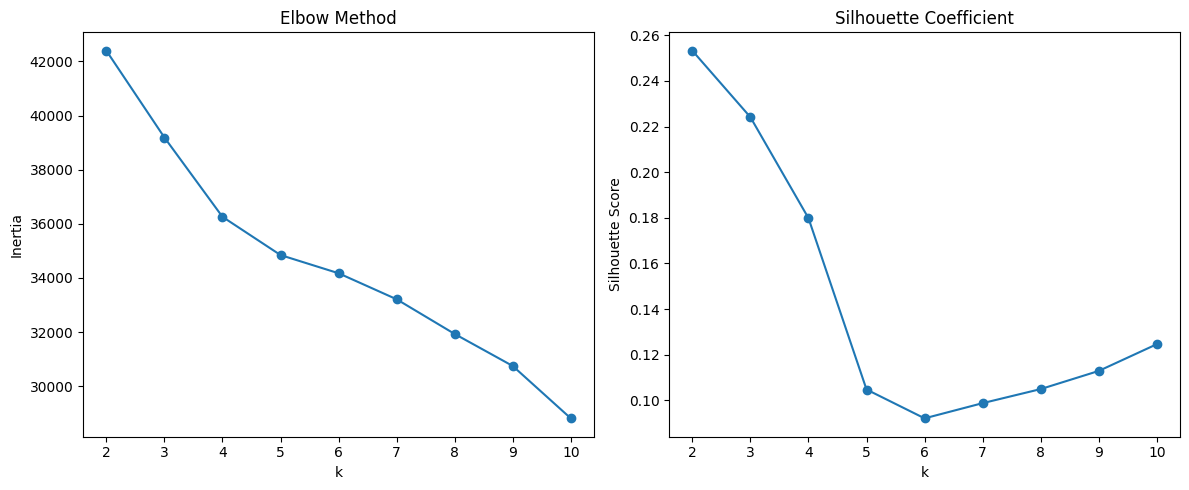

                         Silhouette  Calinski-Harabasz  Davies-Bouldin  \
KMeans                     0.224087         415.901093        2.105799   
AgglomerativeClustering    0.191927         357.892178        2.275224   

                             Dunn  
KMeans                   0.039252  
AgglomerativeClustering  0.043577  


In [5]:
# Import libraries
!pip install -q scikit-learn pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances
# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer

url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringcampaign.csv'
df = pd.read_csv(url, delimiter='\t') # Use delimiter='\t' to correctly parse the data
df.head()

# Data preprocessing
# Create an imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
# Apply the imputer to the numerical features of the DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=np.number)), columns=df.select_dtypes(include=np.number).columns)

# Now, use the imputed DataFrame for scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)


# Elbow and Silhouette method for KMeans
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plotting Elbow and Silhouette
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Coefficient")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

# Apply KMeans and Agglomerative Clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
agglo = AgglomerativeClustering(n_clusters=k).fit(X_scaled)

# Evaluate both models
def dunn_index(X, labels):
    distances = pairwise_distances(X)
    unique_clusters = np.unique(labels)
    intra_dists = [np.max(distances[np.ix_(labels == k, labels == k)]) for k in unique_clusters]
    inter_dists = [np.min(distances[np.ix_(labels == i, labels == j)]) for i in unique_clusters for j in unique_clusters if i != j]
    return np.min(inter_dists) / np.max(intra_dists)

def evaluate_model(X, labels):
    return {
        'Silhouette': silhouette_score(X, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X, labels),
        'Davies-Bouldin': davies_bouldin_score(X, labels),
        'Dunn': dunn_index(X, labels)
    }

kmeans_scores = evaluate_model(X_scaled, kmeans.labels_)
agglo_scores = evaluate_model(X_scaled, agglo.labels_)

# Create a DataFrame for better readability
scores_df = pd.DataFrame([kmeans_scores, agglo_scores], index=['KMeans', 'AgglomerativeClustering'])

# Display the scores in a table
print(scores_df)

Penjelasan Rumus:
Silhouette Coefficient

𝑠
(
𝑖
)
=
𝑓
𝑟
𝑎
𝑐
𝑏
(
𝑖
)
−
𝑎
(
𝑖
)
𝑚
𝑎
𝑥
(
𝑎
(
𝑖
)
,
𝑏
(
𝑖
)
)
s(i)=
fracb(i)−a(i)max(a(i),b(i))
𝑎
(
𝑖
)
a(i): rata-rata jarak dari titik
𝑖
i ke titik lain dalam cluster yang sama

𝑏
(
𝑖
)
b(i): rata-rata jarak dari titik
𝑖
i ke titik dalam cluster terdekat berikutnya

Nilai antara -1 (buruk) hingga 1 (bagus)

Calinski-Harabasz Index

𝐶
𝐻
=
Between-Cluster Dispersion
Within-Cluster Dispersion
×
(
𝑁
−
𝑘
)
(
𝑘
−
1
)
CH=
Within-Cluster Dispersion
Between-Cluster Dispersion
​
 ×
(k−1)
(N−k)
​

Semakin tinggi, semakin baik

Davies-Bouldin Index

𝐷
𝐵
=
1
𝑘
∑
𝑖
=
1
𝑘
max
⁡
𝑗
≠
𝑖
(
𝜎
𝑖
+
𝜎
𝑗
𝑑
(
𝑐
𝑖
,
𝑐
𝑗
)
)
DB=
k
1
​
  
i=1
∑
k
​
  
j

=i
max
​
 (
d(c
i
​
 ,c
j
​
 )
σ
i
​
 +σ
j
​

​
 )
𝜎
σ: rata-rata jarak ke pusat cluster

𝑑
d: jarak antar pusat cluster

Semakin kecil, semakin baik

Dunn Index

𝐷
=
min
⁡
(
inter-cluster distances
)
max
⁡
(
intra-cluster distances
)
D=
max(intra-cluster distances)
min(inter-cluster distances)
​

Makin besar Dunn Index, makin baik pemisahan antar cluster.

